In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from recommender import matrix_factorization

In [2]:
## Dummy dataset
a = pd.DataFrame([

     [1,5,3,0,1],

     [2,4,0,0,1],

     [3,1,1,0,5],

     [4,1,0,0,4],

     [5,0,1,5,4],
    
     [6,2,1,3,0],

    ]).set_index(0)

a.index.names = ['userId']
a.columns.names = ['movieId']

In [3]:
mse = []
for k in range(1, 51, 1):
    r = matrix_factorization(a,k)
    r.fit(iterations=500)
    mse.append(np.mean(r.mse))

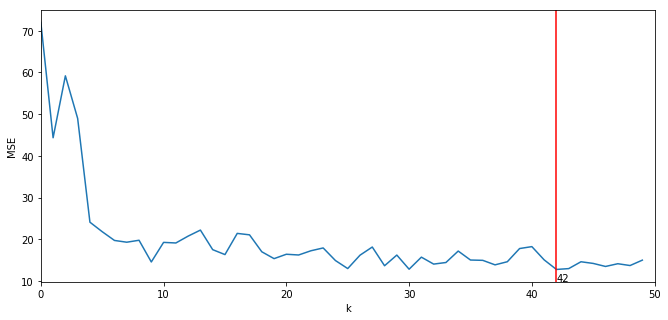

In [4]:
plt.figure(figsize=(11, 5))
plt.plot(mse)
plt.xlim(0,len(mse))
plt.xlabel("k")
plt.ylabel("MSE")
plt.axvline(np.argmin(mse), color = "r")
plt.annotate(f"{np.argmin(mse)}", xy=(np.argmin(mse),10))
plt.show()

In [5]:
## Best matrix with best k
k=np.argmin(mse)
recomm = matrix_factorization(a,k)
## Train the model, default iterations is 2
recomm.fit(iterations=1000)

In [6]:
## Get the Predicted matrix
recomm.matrix

array([[5.50219478, 3.48394959, 0.50365895, 1.5043606 ],
       [4.49884705, 0.50505779, 0.50111342, 1.49776219],
       [1.49893925, 1.5029154 , 0.50259492, 5.49796467],
       [1.49811998, 0.50901398, 0.50113043, 4.49633644],
       [0.50048816, 1.50299264, 5.49490487, 4.50086933],
       [2.50141079, 1.49607059, 3.4965974 , 0.50270676]])

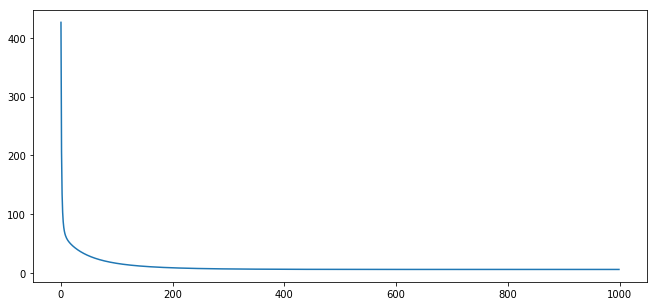

In [7]:
## Plot MSE over iterations
plt.figure(figsize=(11, 5))
plt.plot(recomm.mse)
plt.show()

In [8]:
## Top n recommends by user, default is 5
recomm.top_recommends(1)

,movieId,rating,title
0,2,3.0,Ariel
1,3,1.0,Shadows in Paradise


## EDA

In [9]:
ratings = pd.read_csv("data/ratings_small.csv")

In [10]:
##Columns not needed
ratings.drop('timestamp', axis=1, inplace=True)

In [11]:
## Order by movieId
ratings.sort_values('movieId', inplace=True)

In [12]:
## Remove float ratings by casting to int
ratings['rating'] = ratings['rating'].astype(int)

In [13]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100004 entries, 9713 to 80823
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   userId   100004 non-null  int64
 1   movieId  100004 non-null  int64
 2   rating   100004 non-null  int32
dtypes: int32(1), int64(2)
memory usage: 2.7 MB


In [14]:
ratings.head()

,userId,movieId,rating
9713,68,1,4
35933,261,1,1
52631,383,1,5
35983,262,1,2
12038,77,1,4


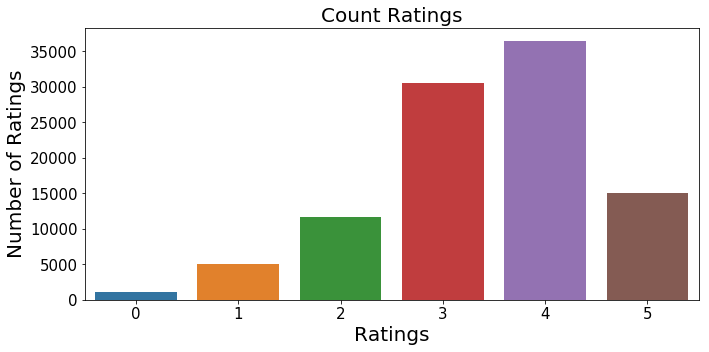

In [15]:
plt.figure(figsize = (11, 5))
sns.countplot(x="rating", data=ratings)
plt.tick_params(labelsize = 15)
plt.title("Count Ratings", fontsize = 20)
plt.xlabel("Ratings", fontsize = 20)
plt.ylabel("Number of Ratings", fontsize = 20)
plt.show()

In [16]:
## Group by userid and count the numbers of movies rated by that user
ratings.groupby("userId")["rating"].count().sort_values(ascending = False).head()

userId
547    2391
564    1868
624    1735
15     1700
73     1610
Name: rating, dtype: int64

In [17]:
## Group by movies and count the number of users rated that movie
ratings.groupby("movieId")["rating"].count().sort_values(ascending = False).head()

movieId
356    341
296    324
318    311
593    304
260    291
Name: rating, dtype: int64

In [18]:
## set userId as index
ratings = ratings.set_index('userId').sort_index(axis = 0)

In [19]:
ratings

,movieId,rating
userId,,
1,2455,2
1,1287,2
1,2968,1
1,1339,3
1,1172,4
...,...,...
671,1266,4
671,1197,3
671,4022,3


In [20]:
## pivot df to get the matrix Yai
ratings = ratings.pivot(index=ratings.index, columns='movieId')['rating']

In [21]:
## replace NAN with movie mean
ratings = ratings.fillna(ratings.mean())
## replace NAN with zero
#ratings = ratings.fillna(0)

In [22]:
ratings

movieId,1,2,3,4,5,6,7,8,9,10,...,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949
userId,,,,,,,,,,,,,,,,,,,,,
1,3.773279,3.317757,3.084746,2.307692,3.178571,3.817308,3.226415,3.8,3.15,3.344262,...,2.0,0.0,3.0,1.0,1.0,5.0,4.0,5.0,3.0,5.0
2,3.773279,3.317757,3.084746,2.307692,3.178571,3.817308,3.226415,3.8,3.15,4.000000,...,2.0,0.0,3.0,1.0,1.0,5.0,4.0,5.0,3.0,5.0
3,3.773279,3.317757,3.084746,2.307692,3.178571,3.817308,3.226415,3.8,3.15,3.344262,...,2.0,0.0,3.0,1.0,1.0,5.0,4.0,5.0,3.0,5.0
4,3.773279,3.317757,3.084746,2.307692,3.178571,3.817308,3.226415,3.8,3.15,4.000000,...,2.0,0.0,3.0,1.0,1.0,5.0,4.0,5.0,3.0,5.0
5,3.773279,3.317757,4.000000,2.307692,3.178571,3.817308,3.226415,3.8,3.15,3.344262,...,2.0,0.0,3.0,1.0,1.0,5.0,4.0,5.0,3.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,3.773279,3.317757,3.084746,2.307692,3.178571,4.000000,3.226415,3.8,3.15,3.344262,...,2.0,0.0,3.0,1.0,1.0,5.0,4.0,5.0,3.0,5.0
668,3.773279,3.317757,3.084746,2.307692,3.178571,3.817308,3.226415,3.8,3.15,3.344262,...,2.0,0.0,3.0,1.0,1.0,5.0,4.0,5.0,3.0,5.0
669,3.773279,3.317757,3.084746,2.307692,3.178571,3.817308,3.226415,3.8,3.15,3.344262,...,2.0,0.0,3.0,1.0,1.0,5.0,4.0,5.0,3.0,5.0


In [ ]:
mse = []
for k in range(2, 11):
    r = matrix_factorization(ratings,k)
    r.fit()
    print((np.mean(r.mse)))
    mse.append(np.mean(r.mse))

In [ ]:
plt.figure(figsize=(11, 5))
plt.plot(mse)
plt.xlabel("k")
plt.ylabel("MSE")
plt.axvline(np.argmin(mse), color = "r")
plt.show()

In [34]:
## Best matrix with best k
k=np.argmin(mse)
recomm = matrix_factorization(ratings,k)
## Train the model
recomm.fit()

In [35]:
## Get the Predicted matrix
recomm.matrix

array([[0.92135705, 0.78525603, 0.73195079, ..., 1.3845646 , 1.10666774,
        0.37904196],
       [0.94926031, 0.78183351, 0.80269616, ..., 1.45159771, 1.11553641,
        0.38809524],
       [0.84573729, 0.69180402, 0.72366658, ..., 1.29768868, 0.9895624 ,
        0.34534595],
       ...,
       [0.73219164, 0.62114724, 0.58682716, ..., 1.10296069, 0.87684069,
        0.30096279],
       [0.87048591, 0.72920345, 0.71420874, ..., 1.31983312, 1.03406242,
        0.35698161],
       [0.83749825, 0.67131004, 0.7411783 , ..., 1.29773839, 0.96746067,
        0.34075505]])

In [36]:
## Top n recommends by user. default is 5
recomm.top_recommends(1)

,movieId,rating,title
0,326,2.0,Snakes on a Plane
1,984,2.0,Dirty Harry
